In [1]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames

import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations

from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import ProbPlot, qqplot

# import sklearn

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score


# READING AND CLEANING THE DATA SET

In [2]:
# Load the data and take a look at it
df = pd.read_csv('Leads.csv',encoding ='latin1')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# calculaing the missing value %
round(df.isnull().sum()/df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [6]:
df.shape

(9240, 37)

In [7]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    df[feature] =df[feature].apply(lambda x : 1 if x=='Yes' else 0)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
# Listing the categorical variables yet to be encoded
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Converting all the selects to NaN 
df = df.replace('Select', np.nan)

In [11]:
#Dropping columns having more than 40% null values
df = df.drop(df.loc[:,list(round(df.isnull().sum()/df.shape[0], 2)>0.40)].columns, 1)

In [12]:
df.shape

(9240, 30)

# impuing the data

In [13]:
df.groupby('City').size()

City
Mumbai                         3222
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Thane & Outskirts               752
Tier II Cities                   74
dtype: int64

In [14]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].isnull().sum()

0

In [15]:
df.groupby('Specialization').size()

Specialization
Banking, Investment And Insurance    338
Business Administration              403
E-Business                            57
E-COMMERCE                           112
Finance Management                   976
Healthcare Management                159
Hospitality Management               114
Human Resource Management            848
IT Projects Management               366
International Business               178
Marketing Management                 838
Media and Advertising                203
Operations Management                503
Retail Management                    100
Rural and Agribusiness                73
Services Excellence                   40
Supply Chain Management              349
Travel and Tourism                   203
dtype: int64

In [16]:
# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other_Specialization')
df['Specialization'].isnull().sum()

0

In [17]:
df.groupby('Tags').size()

Tags
Already a student                                     465
Busy                                                  186
Closed by Horizzon                                    358
Diploma holder (Not Eligible)                          63
Graduation in progress                                111
In confusion whether part time or DLP                   5
Interested  in full time MBA                          117
Interested in Next batch                                5
Interested in other courses                           513
Lateral student                                         3
Lost to EINS                                          175
Lost to Others                                          7
Not doing further education                           145
Recognition issue (DEC approval)                        1
Ringing                                              1203
Shall take in the next coming month                     2
Still Thinking                                          6
Universit

In [18]:
# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')
df['Tags'].isnull().sum()

0

In [19]:
df.groupby('What matters most to you in choosing a course').size()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
dtype: int64

In [20]:
# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
df['What matters most to you in choosing a course'].isnull().sum()

0

In [21]:
df.groupby('Country').sum()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
Country,,,,,,,,,,,,,,,,,,,
Asia/Pacific Region,1202856,0,0,1,3.0,1667,2.00,0,0,0,0,0,0,0,0,0,0,0,0
Australia,7869421,1,0,3,60.0,8694,49.00,0,0,0,0,0,0,0,0,0,0,0,5
Bahrain,4335281,1,0,4,29.0,5294,18.00,0,0,0,0,0,0,0,0,0,0,0,5
Bangladesh,1167236,1,0,1,8.0,2192,5.00,0,0,0,0,0,0,0,0,0,0,0,2
Belgium,1253977,0,0,0,9.0,310,6.00,0,0,0,0,0,0,0,0,0,0,0,0
Canada,2444582,1,0,0,22.0,1079,11.33,0,0,0,0,0,0,0,0,0,0,0,2
China,1228865,0,0,0,4.0,383,3.00,0,0,0,0,0,0,0,0,0,0,0,1
Denmark,591612,0,0,1,4.0,1200,4.00,0,0,0,0,0,0,0,0,0,0,0,1
France,3768459,1,0,3,40.0,4480,16.73,0,0,0,0,0,0,0,0,0,0,0,5


In [22]:
# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
df['Country'] = df['Country'].replace(np.nan, 'India')

In [23]:
df['Country'].isnull().sum()

0

In [24]:
# Checking missing data percentage in the updated dataframe
100*df.isnull().mean()


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

# univariate Analysis

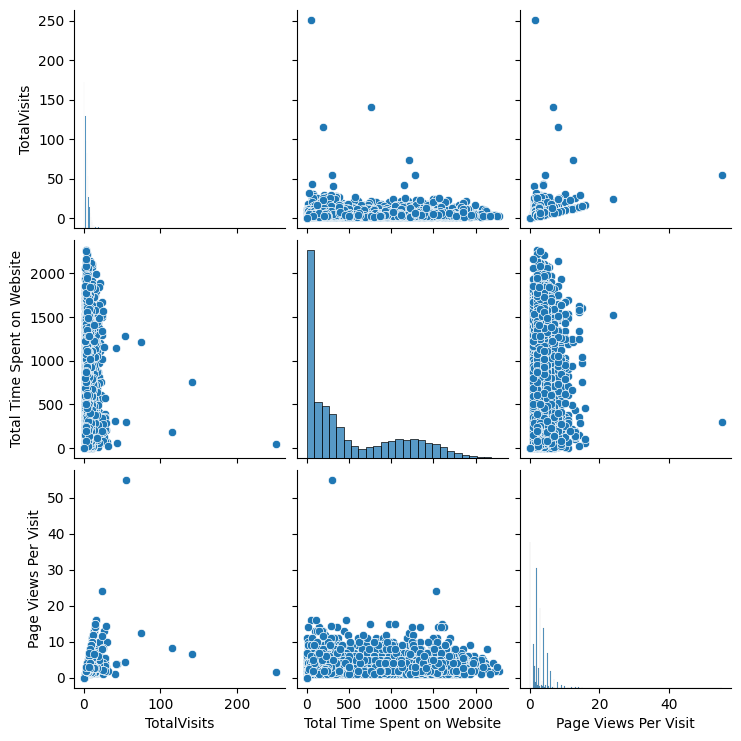

In [30]:
num_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
#creating pair plot
sns.pairplot(df[num_col])
plt.show()

In [25]:
df["Converted"].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [31]:
def cat_var(df, cat):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=cat, hue='Converted', data=df)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width / 2, y + height * 1.02), ha='center')
    
    plt.xticks(rotation=90)
    plt.show()

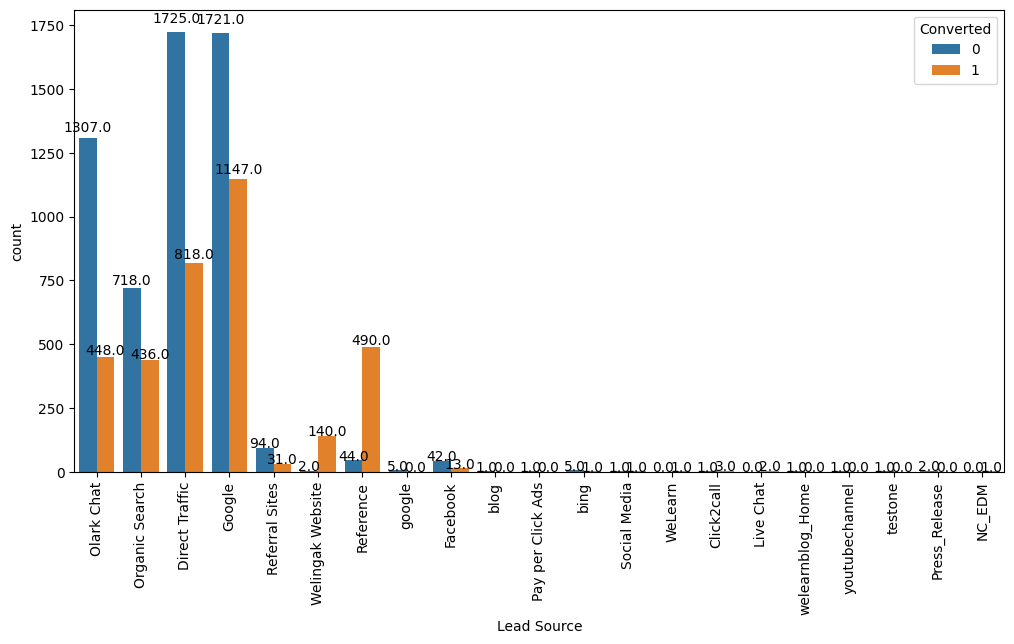

In [32]:
cat_var(df, 'Lead Source')

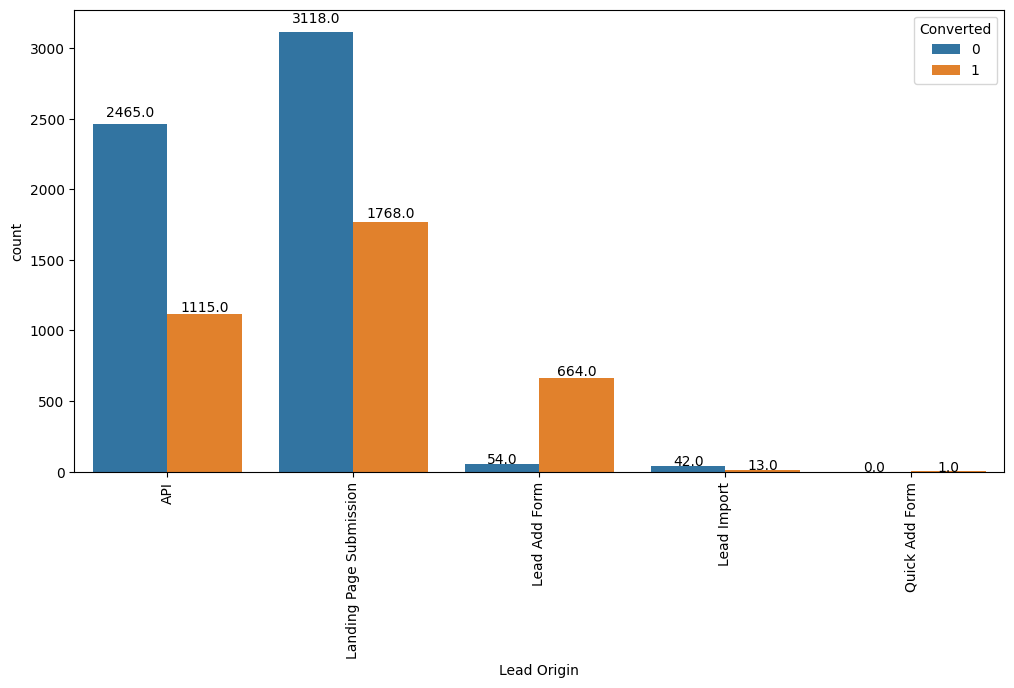

In [33]:
cat_var(df, 'Lead Origin')

In [34]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
                                                        'View in browser link Clicked', 'Approached upfront',
                                                        'Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Received', 'Email Marked Spam',
                                                        'Form Submitted on Website'], 'Other Methods')
df['Last Activity'] = df['Last Activity'].replace('Others', 'Other Methods')

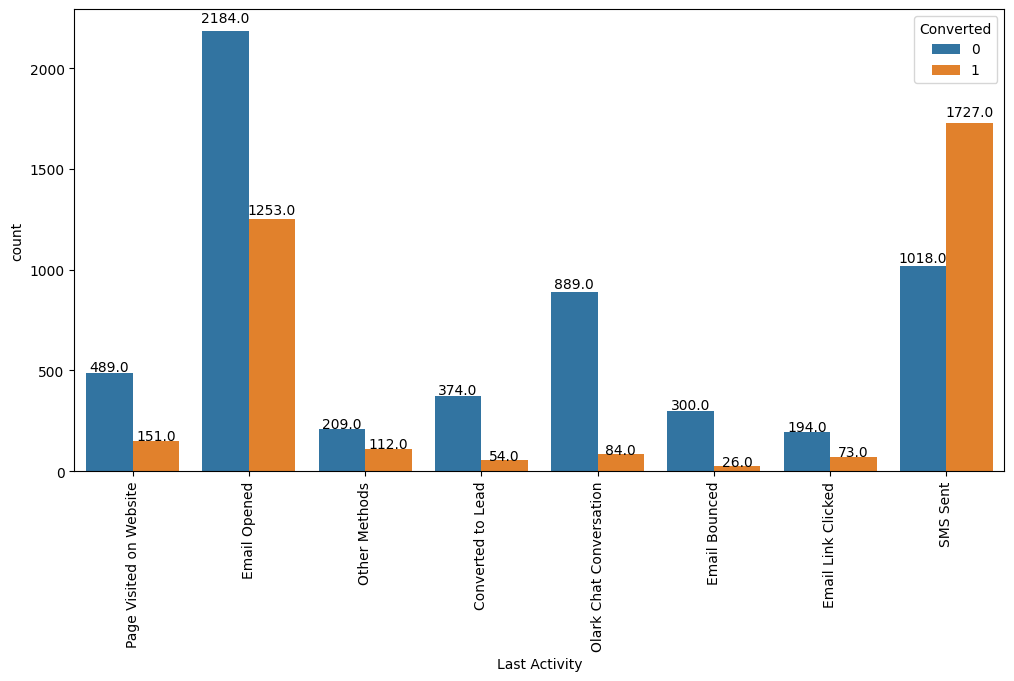

In [35]:
cat_var(df, 'Last Activity')

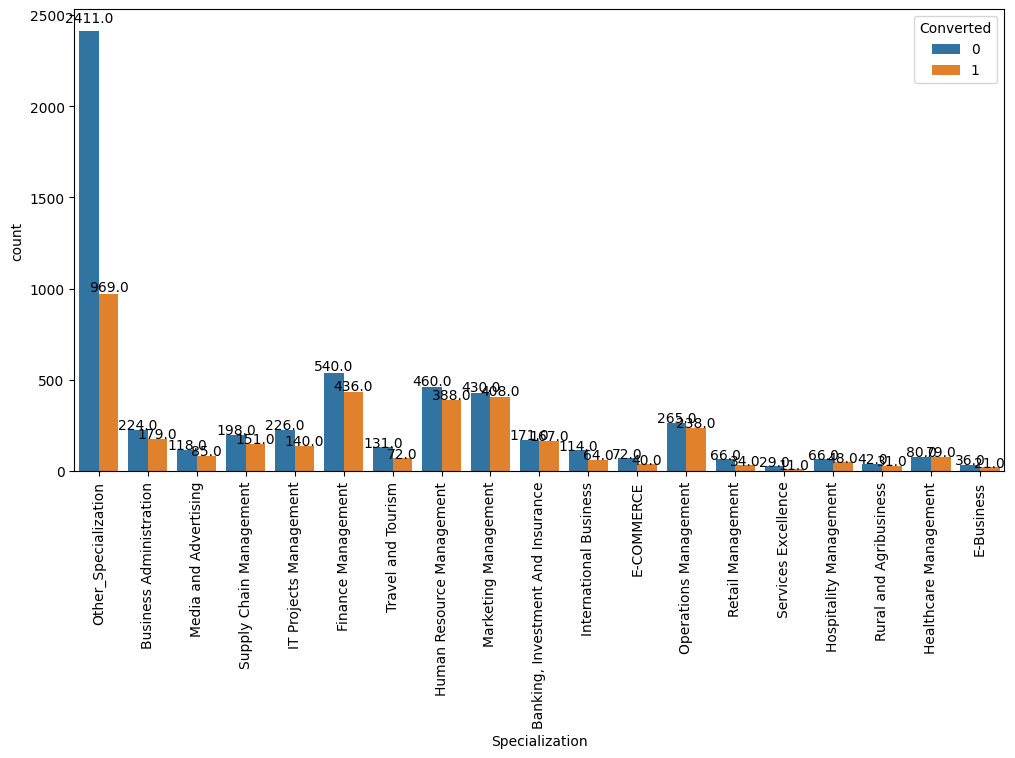

In [36]:
cat_var(df,'Specialization')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [38]:
# Grouping values with low count in order to remove bias
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced', 'Email Link Clicked','Unreachable', 'Had a Phone Conversation','Olark Chat Conversation', 'Approached upfront','Resubscribed to emails', 'Unsubscribed'
                                                                   ,'View in browser link Clicked','Form Submitted on Website', 'Email Received','Email Marked Spam'], 'Others')

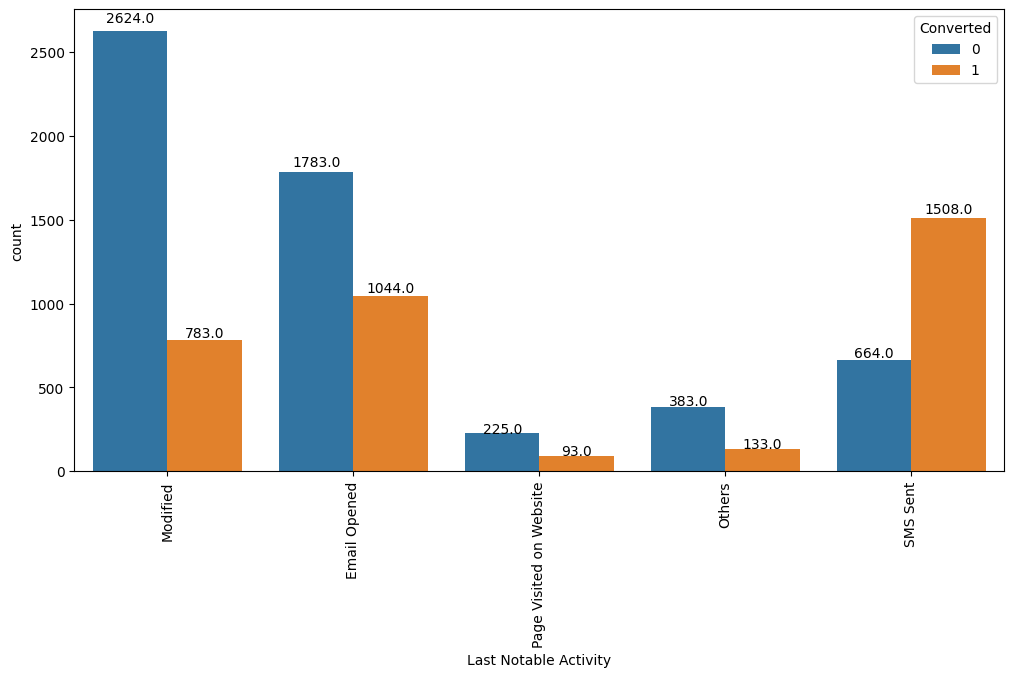

In [39]:
cat_var(df,'Last Notable Activity')

# OUTLINER

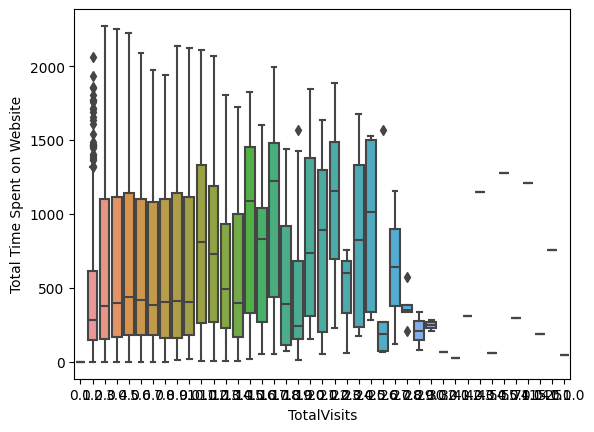

In [40]:
sns.boxplot(x = df["TotalVisits"], y = df["Total Time Spent on Website"])
plt.show()

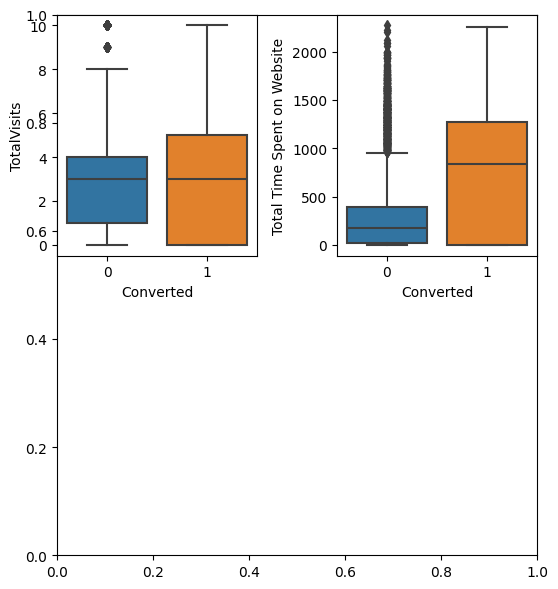

In [41]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 
q1 = df["TotalVisits"].quantile(0.95)
df["TotalVisits"][df["TotalVisits"] >= q1] = q1

fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = df)
    plt.tight_layout()

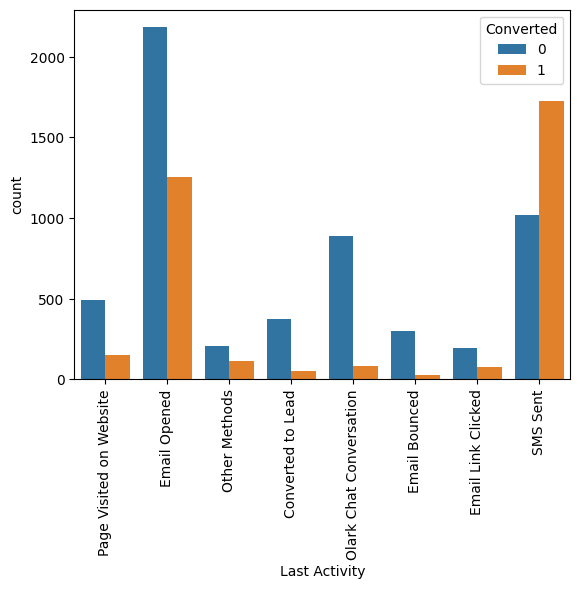

In [42]:
# Plotting the Last Activity again 

sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks(rotation='vertical')
plt.show()

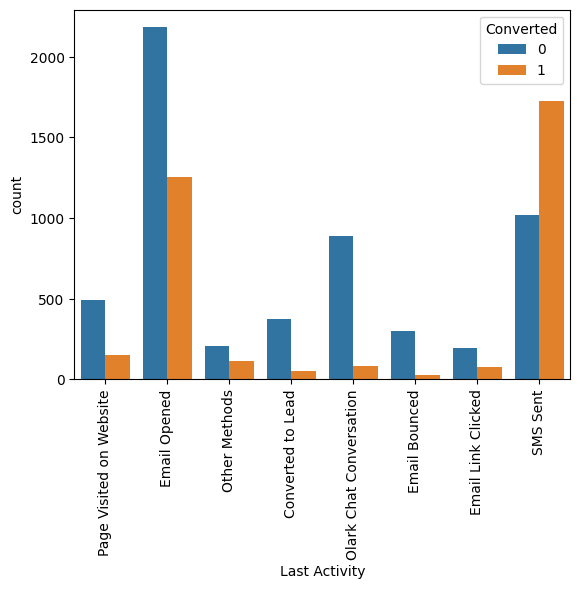

In [43]:
# Converting all the low count categories to the 'Others' category
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

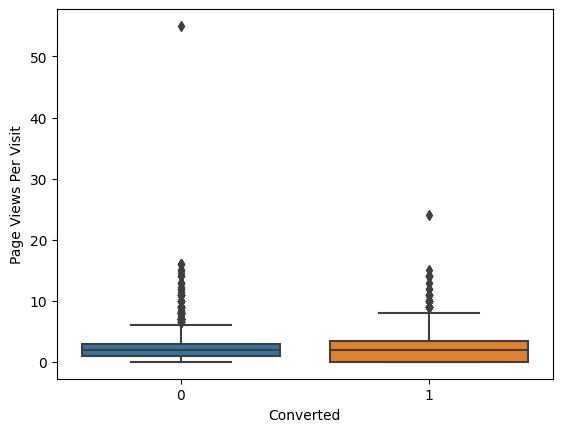

In [44]:
# Checking 'Page Views Per Visit' vs 'Converted'
sns.boxplot(x = df['Converted'], y = df['Page Views Per Visit'])
plt.show()

In [45]:
df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.000000
mean,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.312554
std,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.463559
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


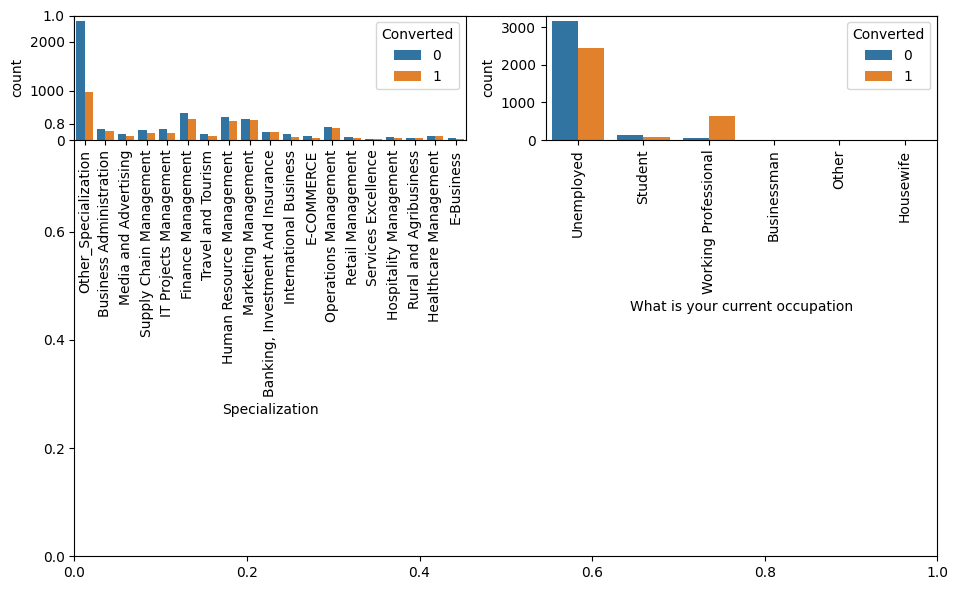

In [46]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

In [47]:
df['What is your current occupation'] = df['What is your current occupation'].replace("Other", 'Other_Occupation')

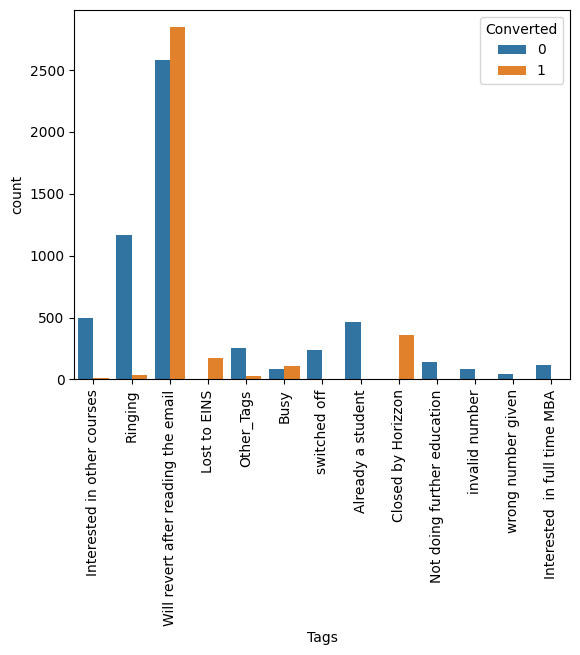

In [48]:
# Converting all low count categories to Others category
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= df)
plt.xticks( rotation='vertical')
plt.show()

##### SUMMARY:

-**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'**


-** To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'**


- **Websites can be made more appealing so as to increase the time of the Users on websites


- **We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent**


- **To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads**


- **We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis**

In [49]:
# Dropping unnecessary columns

df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Methods,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


In [50]:
dummy = pd.get_dummies(df[[ 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)

In [51]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [52]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


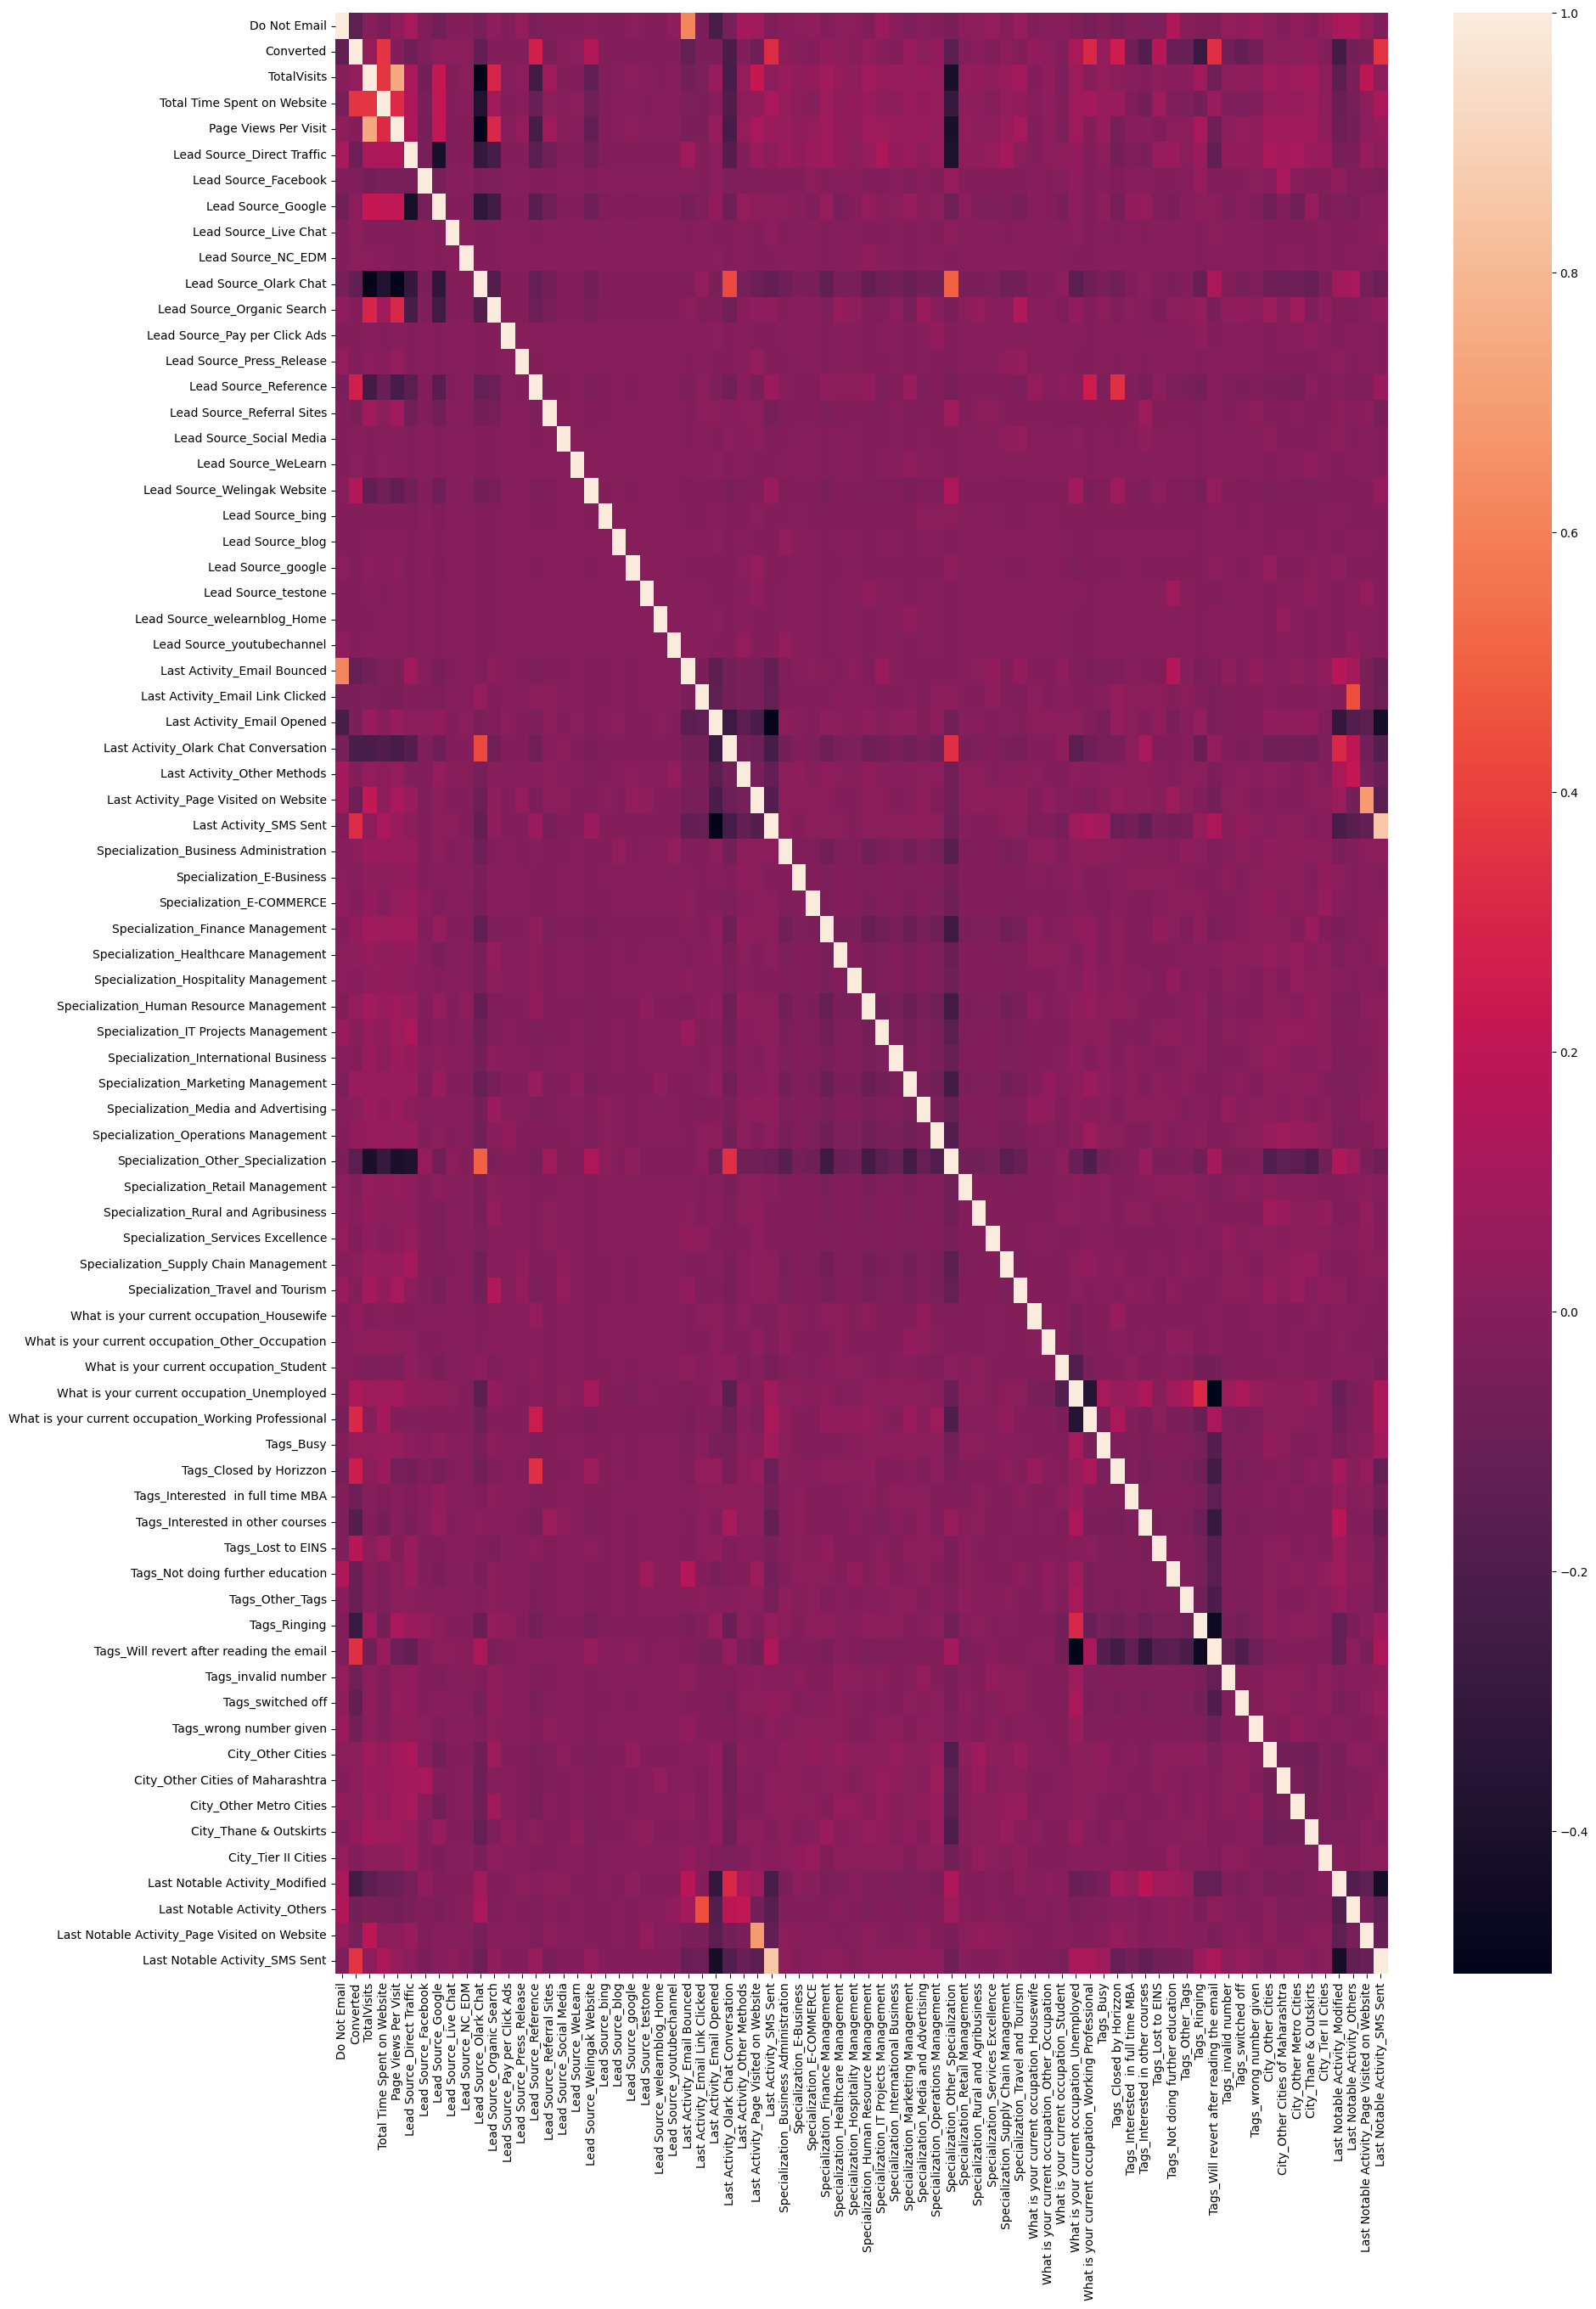

In [56]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(df.corr())
plt.show()

#  Test-Train Split

In [57]:
# # Putting feature variable to X

In [58]:
y = df['Converted']

X = df.drop(['Prospect ID','Converted'], axis=1)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 100)

In [60]:
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,0.0,0,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,0,4.0,487,1.33,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0,5.0,106,2.50,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8105,0,5.0,1230,5.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3934,0,0.0,0,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-1.141867,-0.885371,-1.079876,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.296462,0.005716,-0.469529,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0,0.656044,-0.691418,0.067394,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.656044,1.365219,1.214664,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3934,0,-1.141867,-0.885371,-1.079876,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [62]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(df['Converted'])/len(df['Converted'].index))*100)

Conversion rate is  38.53896103896104


In [63]:

conv_corr = df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")

# Masking the upper triangle of the correlation matrix
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Applying the mask to get the upper triangle only
conv_corr_upper = conv_corr.where(mask)

# Unstacking and sorting to find top correlations
top_corr = conv_corr_upper.stack().sort_values(ascending=False).head(10)

print(top_corr)

Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.852707
TotalVisits                            Page Views Per Visit                             0.739003
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.692057
Do Not Email                           Last Activity_Email Bounced                      0.618470
Lead Source_Olark Chat                 Specialization_Other_Specialization              0.498951
Last Activity_Email Link Clicked       Last Notable Activity_Others                     0.444803
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation            0.426248
TotalVisits                            Total Time Spent on Website                      0.363183
Converted                              Total Time Spent on Website                      0.362483
                                       Last Notable Activity_SMS Sent                   0.351845
dtype: float64


# Model Building

In [64]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train_dropped, y_train_dropped)

In [67]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 44),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', False, 55),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 59),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 57),
 ('Lead Source_Welingak Website', False, 4),
 ('Lead Source_bing', False, 52),
 ('Lead Source_blog', False, 31),
 ('Lead Source_google', False, 22),
 ('Lead Source_testone', False, 61),
 ('Lead Source_welearnblog_Home', False, 37),
 ('Lead Source_youtubechannel', False, 39),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Acti

In [68]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [69]:
#All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [70]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [71]:
# Importing statsmodels
import statsmodels.api as sm

In [72]:
# Ensure X_train and y_train are numeric
X_train = X_train.astype(float)  # Convert X_train to float if necessary
y_train = y_train.astype(float)  # Convert y_train to float if necessary

# Add constant to X_train for intercept in GLM
X_train_sm = sm.add_constant(X_train)

# Initialize and fit the GLM model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1413.1
Date:                Sat, 29 Jun 2024   Deviance:                       2826.2
Time:                        18:56:09   Pearson chi2:                 2.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5903
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [73]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,2.35
10,Tags_Will revert after reading the email,1.91
0,Last Activity_SMS Sent,1.65
9,Tags_Ringing,1.49
14,Last Notable Activity_Modified,1.43
5,What is your current occupation_Working Profes...,1.24
7,Tags_Closed by Horizzon,1.18
12,Tags_switched off,1.11
6,Tags_Busy,1.09
8,Tags_Lost to EINS,1.05


In [75]:
print(X_train.columns)

Index(['Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')


In [76]:
#The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1413.1
Date:                Sat, 29 Jun 2024   Deviance:                       2826.2
Time:                        18:58:01   Pearson chi2:                 2.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5903
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.0500      0.220    -32.004      0.000      -7.482      -6.618
Last Activity_SMS Sent                                   2.2776      0.118     19.242      0.000       2.046       2.510
What is your current occupation_Housewife               25.4310   2.37e+04      0.001      0.999   -4.64e+04    4.65e+04
What is your current occupation_Other_Occupation         4.8209      1.658      2.908      0.004       1.572       8.070
What is your current occupation_Student                  3.6592      0.344     10.641      0.000       2.985       4.333
What is your current occupation_Unemployed               3.9615      0.124     32.035      0.000       3.719       4.204
What is your current occupation_Working Professional     5.4285      0.290     18.728      0.000       4.860       5.997
Tags_Busy                                                2.0641      0.276      7.489      0.000       1.524       2.604
Tags_Closed by Horizzon                                  9.6376      1.051      9.173      0.000       7.578      11.697
Tags_Lost to EINS                                       10.7681      0.770     13.991      0.000       9.260      12.277
Tags_Ringing                                            -1.7242      0.278     -6.198      0.000      -2.269      -1.179
Tags_Will revert after reading the email                 4.8921      0.191     25.603      0.000       4.518       5.267
Tags_invalid number                                     -2.2459      1.037     -2.166      0.030      -4.278      -0.213
Tags_switched off                                       -2.1865      0.544     -4.016      0.000      -3.254      -1.119
Tags_wrong number given                                -21.5546    1.3e+04     -0.002      0.999   -2.54e+04    2.54e+04
Last Notable Activity_Modified                          -1.4512      0.111    -13.128      0.000      -1.668      -1.235
========================================================================================================================
"""

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,2.35
10,Tags_Will revert after reading the email,1.91
0,Last Activity_SMS Sent,1.65
9,Tags_Ringing,1.49
14,Last Notable Activity_Modified,1.43
5,What is your current occupation_Working Profes...,1.24
7,Tags_Closed by Horizzon,1.18
12,Tags_switched off,1.11
6,Tags_Busy,1.09
8,Tags_Lost to EINS,1.05


In [81]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [82]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.3
Date:                Sat, 29 Jun 2024   Deviance:                       2852.7
Time:                        18:59:39   Pearson chi2:                 2.66e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9973      0.219    -31.985      0.000      -7.426      -6.569
Last Activity_SMS Sent                                   2.2470      0.117     19.149      0.000       2.017       2.477
What is your current occupation_Other_Occupation         4.7730      1.655      2.885      0.004       1.530       8.016
What is your current occupation_Student                  3.6163      0.343     10.540      0.000       2.944       4.289
What is your current occupation_Unemployed               3.9192      0.122     32.028      0.000       3.679       4.159
What is your current occupation_Working Professional     5.3856      0.289     18.627      0.000       4.819       5.952
Tags_Busy                                                2.0727      0.275      7.538      0.000       1.534       2.612
Tags_Closed by Horizzon                                 10.2630      1.063      9.651      0.000       8.179      12.347
Tags_Lost to EINS                                       10.7188      0.769     13.937      0.000       9.211      12.226
Tags_Ringing                                            -1.7086      0.278     -6.149      0.000      -2.253      -1.164
Tags_Will revert after reading the email                 4.8832      0.191     25.608      0.000       4.509       5.257
Tags_invalid number                                     -2.2300      1.037     -2.151      0.031      -4.262      -0.198
Tags_switched off                                       -2.1696      0.544     -3.986      0.000      -3.236      -1.103
Tags_wrong number given                                -21.5409    1.3e+04     -0.002      0.999   -2.55e+04    2.54e+04
Last Notable Activity_Modified                          -1.4521      0.110    -13.202      0.000      -1.668      -1.237
========================================================================================================================
"""

In [83]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,2.35
9,Tags_Will revert after reading the email,1.91
0,Last Activity_SMS Sent,1.65
8,Tags_Ringing,1.49
13,Last Notable Activity_Modified,1.43
4,What is your current occupation_Working Profes...,1.23
6,Tags_Closed by Horizzon,1.17
11,Tags_switched off,1.11
5,Tags_Busy,1.09
7,Tags_Lost to EINS,1.05


In [85]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.3
Date:                Sat, 29 Jun 2024   Deviance:                       2852.7
Time:                        19:01:17   Pearson chi2:                 2.66e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9973      0.219    -31.985      0.000      -7.426      -6.569
Last Activity_SMS Sent                                   2.2470      0.117     19.149      0.000       2.017       2.477
What is your current occupation_Other_Occupation         4.7730      1.655      2.885      0.004       1.530       8.016
What is your current occupation_Student                  3.6163      0.343     10.540      0.000       2.944       4.289
What is your current occupation_Unemployed               3.9192      0.122     32.028      0.000       3.679       4.159
What is your current occupation_Working Professional     5.3856      0.289     18.627      0.000       4.819       5.952
Tags_Busy                                                2.0727      0.275      7.538      0.000       1.534       2.612
Tags_Closed by Horizzon                                 10.2630      1.063      9.651      0.000       8.179      12.347
Tags_Lost to EINS                                       10.7188      0.769     13.937      0.000       9.211      12.226
Tags_Ringing                                            -1.7086      0.278     -6.149      0.000      -2.253      -1.164
Tags_Will revert after reading the email                 4.8832      0.191     25.608      0.000       4.509       5.257
Tags_invalid number                                     -2.2300      1.037     -2.151      0.031      -4.262      -0.198
Tags_switched off                                       -2.1696      0.544     -3.986      0.000      -3.236      -1.103
Tags_wrong number given                                -21.5409    1.3e+04     -0.002      0.999   -2.55e+04    2.54e+04
Last Notable Activity_Modified                          -1.4521      0.110    -13.202      0.000      -1.668      -1.237
========================================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,2.35
9,Tags_Will revert after reading the email,1.91
0,Last Activity_SMS Sent,1.65
8,Tags_Ringing,1.49
13,Last Notable Activity_Modified,1.43
4,What is your current occupation_Working Profes...,1.23
6,Tags_Closed by Horizzon,1.17
11,Tags_switched off,1.11
5,Tags_Busy,1.09
7,Tags_Lost to EINS,1.05


#  Creating Prediction

In [88]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008271
6795    0.858770
3516    0.008271
8105    0.073120
3934    0.587336
4844    0.996004
3297    0.008271
8071    0.999253
987     0.027484
7423    0.982911
dtype: float64

In [89]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00827085, 0.85876971, 0.00827085, 0.07312033, 0.58733595,
       0.99600382, 0.00827085, 0.99925329, 0.02748389, 0.98291135])

In [90]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.008271
1,0.0,0.858770
2,0.0,0.008271
3,0.0,0.073120
4,0.0,0.587336


In [91]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.008271,0
1,0.0,0.858770,1
2,0.0,0.008271,0
3,0.0,0.073120,0
4,0.0,0.587336,1


#  Model Evaluation

In [92]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3702,  300],
       [ 213, 2253]], dtype=int64)

In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9206864564007421

In [94]:
#accuray is 92% which is very good
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [95]:
# Calculating the sensitivity
TP/(TP+FN)

0.9136253041362531

In [96]:
# Calculating the specificity
TN/(TN+FP)

0.9250374812593704

#  Optimise Cut off (ROC Curve)

In [97]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

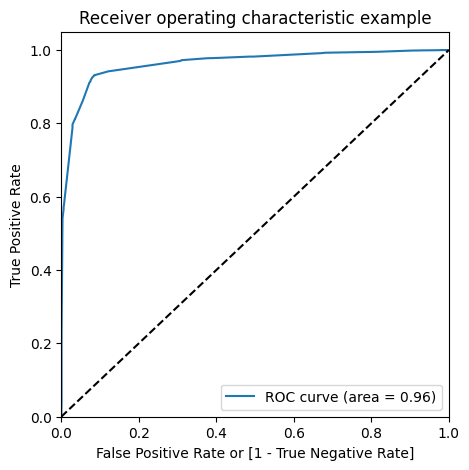

In [99]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# roc value is 096 which is very good

In [100]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.008271,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.858770,1,1,1,1,1,1,1,1,1,1,0
2,0.0,0.008271,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.073120,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.587336,1,1,1,1,1,1,1,0,0,0,0


In [101]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.803958,0.968775,0.702399
0.2,0.2,0.901979,0.942417,0.877061
0.3,0.3,0.922078,0.924574,0.920540
0.4,0.4,0.921614,0.917275,0.924288
0.5,0.5,0.920686,0.913625,0.925037
0.6,0.6,0.906308,0.811841,0.964518
0.7,0.7,0.906308,0.811841,0.964518
0.8,0.8,0.904762,0.797242,0.971014
0.9,0.9,0.832715,0.570965,0.994003


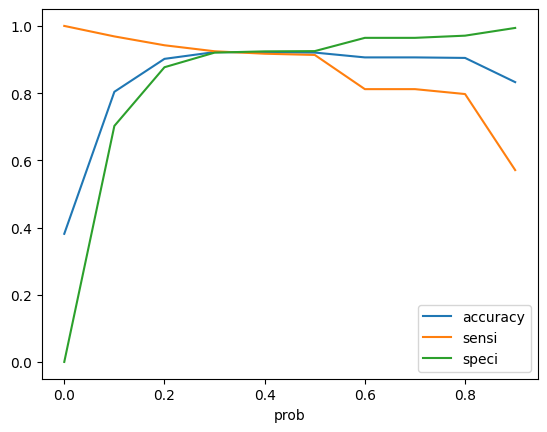

In [102]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.008271,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.858770,1,1,1,1,1,1,1,1,1,1,0,1
2,0.0,0.008271,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.073120,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.587336,1,1,1,1,1,1,1,0,0,0,0,1


In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9216141001855288

In [105]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3699,  303],
       [ 204, 2262]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [107]:
# Calculating the sensitivity
TP/(TP+FN)

0.9172749391727494

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.9242878560719641